# Examen Práctico 

#### 3670 COM:01-3900 | Ciencia de datos | 2024 C2

Alumnos:

## Enunciado

Se tiene un dataset con datos del historial de solicitantes a quienes se le otorgaron créditos y su situación final como deudores o pagadores. La entidad tiene que determinar a quienes entregar o no un crédito en función de su propensión a caer en "default". Desarrolle un proceso que clasifique deudores y pagadores. Observe que la clase de interés es "default", y debido a nuevas políticas de encaje bancario se ha expresado el objetivo de evitar tanto como sea posible entregar créditos a deudores (a costa naturalmente de perder algún posible crédito a pagadores). Maximice la métrica correspondiente sin modificar threshold.

 Las columnas tienen nombres descriptivos, pero para mas información:

Importe: Cuando dinero esta pidiendo prestado</BR>
añosPago: Tiempo para pagar el crédito</BR>
IngresoAnuales: Ingresos anuales del solicitante</BR>
RelacionIngresoDeuda: Ratio entre sus ingresos y la deuda</BR>
RelacionCuotaDeuda: Ratio entre sus ingresos y la cuota</BR>
PendienteEnTarjeta: Pendiente de pago en tarjetas de crédito</BR>
UsoCreditoTarjeta: Volumen de dinero que maneja con sus instrumentos de crédito</BR>
Objetivo: ¿Para que quiere el préstamos?</BR>
esPropietario: ¿Es propietario del su casa?</BR>
FueVeraz: ¿Alguna vez estuvo en el veraz?</BR>
TuvoEmbargo: ¿Tuvo algun embargo o situación judicial?</BR>
Cuentas: Cantidad de cuentas que maneja</BR>
PuntuacionGeneral: Puntuación crediticia otorgada por un organismo regular</BR>
Default: Si pagó o no el crédito</BR>
AntiguedadLaboral: Antiguedad laboral</BR>

## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general. 

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR> 



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente, recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos. Ej: "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si EVALUACION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa línea y la predición final (Evitando al fuga de datos).Puede dejar funcionando implementaciones alternativas que no prosperaron en notebooks separados. En cuanto comience con el desarrollo informe a los docentes el nombre del repositorio.


## Evaluacion final - Docente + Alumno

In [1]:
STUDENTDATAFILE = 'creditos_banco_alumnos.csv'
EVALDATAFILE    = 'creditos_banco_evaluacion.csv'
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.discriminant_analysis import StandardScaler



Lectura de los datos

In [2]:
df = pd.read_csv(STUDENTDATAFILE)

### Analisis

No tenemos registros duplciados

In [3]:
print("Cantidad Duplicados:",  df.duplicated().sum())

Cantidad Duplicados: 0


No tenemos nulos que imputar

In [4]:
df.isna().sum()/df.shape[0]*100

Importe                 0.0
añosPago                0.0
IngresoAnuales          0.0
RelacionIngresoDeuda    0.0
RelacionCuotaDeuda      0.0
PendienteEnTarjeta      0.0
UsoCreditoTarjeta       0.0
Objetivo                0.0
esPropietario           0.0
FueVeraz                0.0
TuvoEmbargo             0.0
Cuentas                 0.0
PuntuacionGeneral       0.0
Default                 0.0
AntiguedadLaboral       0.0
dtype: float64

In [5]:
df.columns

Index(['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
       'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
       'Objetivo', 'esPropietario', 'FueVeraz', 'TuvoEmbargo', 'Cuentas',
       'PuntuacionGeneral', 'Default', 'AntiguedadLaboral'],
      dtype='object')

In [6]:
df.dtypes

Importe                   int64
añosPago                  int64
IngresoAnuales            int64
RelacionIngresoDeuda    float64
RelacionCuotaDeuda      float64
PendienteEnTarjeta        int64
UsoCreditoTarjeta       float64
Objetivo                 object
esPropietario            object
FueVeraz                  int64
TuvoEmbargo               int64
Cuentas                   int64
PuntuacionGeneral       float64
Default                  object
AntiguedadLaboral         int64
dtype: object

Al revisar el dataset y los tipos concluimos que tenemos con categoricos a estas columnas:

In [7]:
print("Columna: 'Objetivo':")
print(df["Objetivo"].unique())
print("Columna: 'esPropietario':")
print(df["esPropietario"].unique())
print("Columna: 'Default':")
print(df["Default"].unique())

Columna: 'Objetivo':
['Deuda' 'Deuda renovable' 'Mudanza' 'Evento' 'Hipoteca' 'No declara'
 'Inversion' 'Negocio' 'Bien de Capital' 'Compra' 'Otros' 'Vacaciones']
Columna: 'esPropietario':
['Hipoteca' 'Alquiler' 'Propio' 'Otro']
Columna: 'Default':
['paid off' 'default']


Como booleanos

In [8]:
print(df["FueVeraz"].value_counts())
print(df["TuvoEmbargo"].value_counts())

FueVeraz
0    29135
1     4871
Name: count, dtype: int64
TuvoEmbargo
0    30985
1     3021
Name: count, dtype: int64


Dependiendo el modelo a utilizar, por las dudas revisamos los valores numericos por si tenemos que normalizar algun campo. Ej: IngresoAnuales

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)

df[['Importe', 'añosPago', 'IngresoAnuales', 'RelacionIngresoDeuda',
    'RelacionCuotaDeuda', 'PendienteEnTarjeta', 'UsoCreditoTarjeta',
    'Cuentas', 'PuntuacionGeneral', 'AntiguedadLaboral']].describe().T

,count,mean,std,min,25%,50%,75%,max
Importe,34006.00,13172.60,8101.33,500.00,7000.00,11500.00,18000.00,35000.00
añosPago,34006.00,3.50,0.87,3.00,3.00,3.00,5.00,5.00
IngresoAnuales,34006.00,68136.86,45495.77,3500.00,42000.00,60000.00,82000.00,1200000.00
RelacionIngresoDeuda,34006.00,16.11,7.59,0.00,10.46,16.01,21.56,38.60
RelacionCuotaDeuda,34006.00,8.03,4.27,0.05,4.66,7.49,10.94,43.55
PendienteEnTarjeta,34006.00,14973.25,21086.54,0.00,5676.50,10807.50,18668.75,1743266.00
UsoCreditoTarjeta,34006.00,56.09,25.44,0.00,38.00,58.50,76.50,119.00
Cuentas,34006.00,10.43,4.73,0.00,7.00,10.00,13.00,76.00
PuntuacionGeneral,34006.00,4.59,1.49,0.20,3.60,4.80,5.80,7.00
AntiguedadLaboral,34006.00,6.31,3.75,0.00,3.00,6.00,11.00,11.00


Haciendo un analisis mas profundo de los ingresos anuales, vemos que hay un sesgo en valores bajos. Consideramos esos valores altos como outliers y que en si no nos aportarian mucha info al ser tan pocos

In [10]:
min_val = df['IngresoAnuales'].min()
max_val = df['IngresoAnuales'].max()

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")

Valor mínimo: 3500
Valor máximo: 1200000


Cantidad de registros por bin:
IngresoAnuales_bin
(2303.5, 242800.0]       33743
(242800.0, 482100.0]       220
(482100.0, 721400.0]        29
(721400.0, 960700.0]        10
(960700.0, 1200000.0]        4
Name: count, dtype: int64


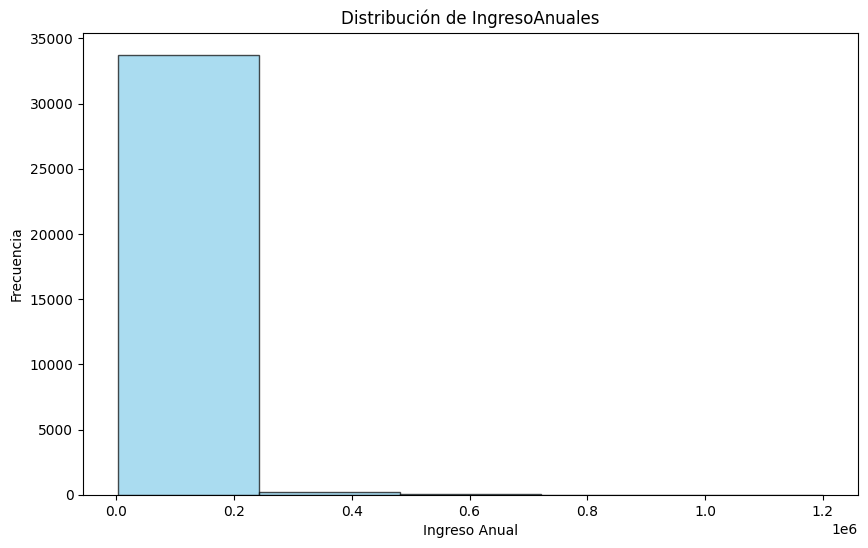

In [11]:
bins = 5
df['IngresoAnuales_bin'] = pd.cut(df['IngresoAnuales'], bins=bins)

bin_counts = df['IngresoAnuales_bin'].value_counts().sort_index()

print("Cantidad de registros por bin:")
print(bin_counts)

plt.figure(figsize=(10, 6))
plt.hist(df['IngresoAnuales'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribución de IngresoAnuales')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')

plt.show()

Luego vemos la distribucion de los datos para cada columna, asi como el conteo de los mismos y una matriz de correlacion para poder ver con que columnas quedarnos

In [ ]:
import seaborn as sns

# Configuración general para gráficos
plt.style.use('seaborn-v0_8-dark')

# 1. Histogramas para la distribución de variables numéricas clave
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['Importe'], kde=True, ax=axes[0, 0]).set_title('Distribución de Importe')
sns.histplot(df['IngresoAnuales'], kde=True, ax=axes[0, 1]).set_title('Distribución de IngresoAnuales')
sns.histplot(df['PendienteEnTarjeta'], kde=True, ax=axes[0, 2]).set_title('Distribución de PendienteEnTarjeta')
sns.histplot(df['RelacionIngresoDeuda'], kde=True, ax=axes[1, 0]).set_title('Distribución de RelacionIngresoDeuda')
sns.histplot(df['RelacionCuotaDeuda'], kde=True, ax=axes[1, 1]).set_title('Distribución de RelacionCuotaDeuda')
sns.histplot(df['AntiguedadLaboral'], kde=True, ax=axes[1, 2]).set_title('Distribución de AntiguedadLaboral')

plt.tight_layout()
plt.show()

# 2. Conteo de valores en las columnas categóricas 'Objetivo', 'esPropietario' y 'Default'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x='Objetivo', order=df['Objetivo'].value_counts().index, ax=axes[0]).set_title('Conteo de Objetivos')
sns.countplot(data=df, x='esPropietario', order=df['esPropietario'].value_counts().index, ax=axes[1]).set_title('Conteo de esPropietario')
sns.countplot(data=df, x='Default', order=df['Default'].value_counts().index, ax=axes[2]).set_title('Conteo de Default')

plt.tight_layout()
plt.show()

# 3. Matriz de correlación para ver relaciones entre variables numéricas
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax).set_title('Matriz de Correlación')

plt.tight_layout()
plt.show()

# 4. Boxplots para detectar outliers en 'IngresoAnuales' y 'PendienteEnTarjeta'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x=df['IngresoAnuales'], ax=axes[0]).set_title('Boxplot de IngresoAnuales')
sns.boxplot(x=df['PendienteEnTarjeta'], ax=axes[1]).set_title('Boxplot de PendienteEnTarjeta')

plt.tight_layout()
plt.show()

### Pipeline

Funciones para el pipeline


In [ ]:
dropna_transformer = FunctionTransformer(lambda df: df.dropna(), validate=False)

def encode_categories(df):
    # Codificar la columna 'Objetivo'
    obj_ordinal = pd.CategoricalDtype(categories=df['Objetivo'].unique(), ordered=True)
    df['Objetivo'] = df['Objetivo'].astype(obj_ordinal).cat.codes

    # Codificar la columna 'esPropietario'
    esPro_ordinal = pd.CategoricalDtype(categories=df['esPropietario'].unique(), ordered=True)
    df['esPropietario'] = df['esPropietario'].astype(esPro_ordinal).cat.codes

    # Mapear valores en la columna 'Default'
    #df['Default'] = df['Default'].map({'paid off': 0, 'default': 1}) #TODO: esto no anda no se por que (de todas formas creo que no hace falta)
    return df


categorical_transformer = FunctionTransformer(encode_categories, validate=False)

def remove_outliers(df):
    # Seleccionar solo columnas numéricas
    outlier_columns = ['IngresoAnuales', 'PendienteEnTarjeta', 'RelacionCuotaDeuda']

    # Detectar y eliminar outliers usando el método del rango intercuartílico (IQR)
    for column in outlier_columns:
        Q1 = df[column].quantile(0.25)  # Primer cuartil
        Q3 = df[column].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        
        # Definir límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar registros que están fuera de los límites
        df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)
    return df

outliners_transformer = FunctionTransformer(remove_outliers, validate=False)

class ColumnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer=SimpleImputer(strategy="mean"), columns=None):
        self.imputer = imputer
        self.columns = columns

    def fit(self, X, y=None):
        #self.imputer.fit(X[self.columns])
        return self
    def get_feature_names_out(self):
        return self.imputer.get_feature_names_out()
    def transform(self, X):
        Xc = X.copy()
        #Xc.loc[:, self.columns] = self.imputer.transform(X[self.columns])

        Xc.loc[:, self.columns] = self.imputer.fit_transform(X[self.columns])
        return Xc


In [ ]:
class NumericScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.scaler = StandardScaler()


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
        X_copy = X.copy()
        X_copy[numeric_columns] = self.scaler.fit_transform(X[numeric_columns])
        return X_copy

In [ ]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self  # Este transformador no aprende nada

    def transform(self, X):
        X_copy = X.copy()
        X_copy.drop(columns=self.columns, inplace=True)
        return X_copy


Pipeline

### Este con SVC da 63

In [ ]:
"""
columns_to_drop = ['AntiguedadLaboral']

pl = Pipeline([
    ('dropna', dropna_transformer),  # Paso para eliminar nulos
    ('drop_columns', ColumnDropper(columns=columns_to_drop)),  # Paso para eliminar columnas
    ('encode_categories', categorical_transformer), # Paso para codificar categorías
    ('remove_outliers', outliners_transformer), # Convierte los outliers en NaN
    ('imputer', ColumnImputer(columns=['IngresoAnuales', 'PendienteEnTarjeta', 'RelacionCuotaDeuda'])),  # Imputar valores NaN con la mediana
    ('scaler', NumericScaler()), #Escala las columnas numéricas (para GradientBoost, el que vamos a entregar, no haría falta)
    ('classifier',SVC(gamma='auto'))
    ],
)
"""

### Este con GradientBoost

In [ ]:
#columns_to_drop = ['AntiguedadLaboral']

pl = Pipeline([
    ('dropna', dropna_transformer),  # Paso para eliminar nulos
    #('drop_columns', ColumnDropper(columns=columns_to_drop)),  # Paso para eliminar columnas
    ('encode_categories', categorical_transformer), # Paso para codificar categorías
    ('remove_outliers', outliners_transformer), # Convierte los outliers en NaN
    ('imputer', ColumnImputer(columns=['IngresoAnuales', 'PendienteEnTarjeta', 'RelacionCuotaDeuda'])),  # Imputar valores NaN con la mediana
    ('classifier', GradientBoostingClassifier())
    ],
)

Procesamiento

In [ ]:
X = df.drop(columns=['Default'])
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pl.fit(X_train, y_train)

In [ ]:
EVALUACION = False
#best_clf = None #Asignar aqui el mejor clasificador posible (previamente entrenado)
best_clf = pl
#Leemos el dataset de evaluación, simulando producción
if EVALUACION==False:
    df = pd.read_csv(STUDENTDATAFILE)
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv(EVALDATAFILE)
#Dividimos en target y predictoras

X_Eval = df.drop("Default", axis=1)
y_Eval = df["Default"]

#Evaluación final

y_pred = best_clf.predict(X_Eval) # esto debe ser un pipeline completo
print(classification_report(y_Eval, y_pred))